In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('criminal_train.csv')
#df.head()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop(['Criminal','PERID'],axis=1))
scaled_features = scaler.transform(df.drop(['Criminal','PERID'],axis=1))
X = pd.DataFrame(scaled_features,columns=df.columns[1:-1])
y=df.iloc[:,-1]


In [3]:
X_train=X.iloc[0:30000,:]
X_val=X.iloc[30000:,:]
y_train=y.iloc[0:30000]
y_val=y.iloc[30000:]

In [71]:
"""
from keras.utils import np_utils
y_train= np_utils.to_categorical(y,num_classes=2)

kernel_initializer='random_uniform',
"""

"\nfrom keras.utils import np_utils\ny_train= np_utils.to_categorical(y,num_classes=2)\n\nkernel_initializer='random_uniform',\n"

In [2]:

count =0
for i in df['Criminal']:
    if i ==0:
        count=count+1

In [3]:
count

42543

In [9]:
from keras.models import Sequential
from keras.layers import Dense ,Dropout,LSTM



In [10]:
model = Sequential()

model.add(Dense(70, input_dim=70,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [147]:

"""
from sklearn.utils.class_weight import compute_class_weight
class_weight_list = compute_class_weight('balanced', np.unique(y), y)
class_weight = dict(zip(np.unique(y), class_weight_list))
"""


In [148]:
#class_weight

In [149]:
import keras.backend as K
def matthews_correlation(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)

    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    numerator = (tp * tn - fp * fn)
    denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    return numerator / (denominator + K.epsilon())



In [5]:
import keras

Using TensorFlow backend.


In [7]:
from keras import metrics

In [8]:
dir(keras.metrics)

['K',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 'absolute_import',
 'binary_accuracy',
 'binary_crossentropy',
 'categorical_accuracy',
 'categorical_crossentropy',
 'cosine',
 'cosine_proximity',
 'deserialize',
 'deserialize_keras_object',
 'get',
 'hinge',
 'kullback_leibler_divergence',
 'logcosh',
 'mae',
 'mape',
 'mean_absolute_error',
 'mean_absolute_percentage_error',
 'mean_squared_error',
 'mean_squared_logarithmic_error',
 'mse',
 'msle',
 'poisson',
 'serialize',
 'six',
 'sparse_categorical_accuracy',
 'sparse_categorical_crossentropy',
 'sparse_top_k_categorical_accuracy',
 'squared_hinge',
 'top_k_categorical_accuracy']

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
hist=model.fit(X_train, y_train, epochs=40, batch_size=20,validation_data=(X_val,y_val))

Train on 30000 samples, validate on 15718 samples
Epoch 1/40
30000/30000 [==============================] - 4s 135us/step - loss: 0.0694 - acc: 0.9681 - val_loss: 0.1791 - val_acc: 0.9467
Epoch 2/40
30000/30000 [==============================] - 4s 135us/step - loss: 0.0755 - acc: 0.9678 - val_loss: 0.1790 - val_acc: 0.9468
Epoch 3/40
30000/30000 [==============================] - 4s 137us/step - loss: 0.0714 - acc: 0.9689 - val_loss: 0.1806 - val_acc: 0.9480
Epoch 4/40
30000/30000 [==============================] - 4s 140us/step - loss: 0.0703 - acc: 0.9691 - val_loss: 0.1913 - val_acc: 0.9471
Epoch 5/40
30000/30000 [==============================] - 4s 138us/step - loss: 0.0694 - acc: 0.9687 - val_loss: 0.1828 - val_acc: 0.9431
Epoch 6/40
30000/30000 [==============================] - 4s 137us/step - loss: 0.0724 - acc: 0.9683 - val_loss: 0.2024 - val_acc: 0.9480
Epoch 7/40
30000/30000 [==============================] - 4s 145us/step - loss: 0.0673 - acc: 0.9704 - val_loss: 0.1928 - 

In [28]:
hist_dic=hist.history

In [32]:
tra_acc=hist_dic['acc']
val_acc=hist_dic['val_acc']

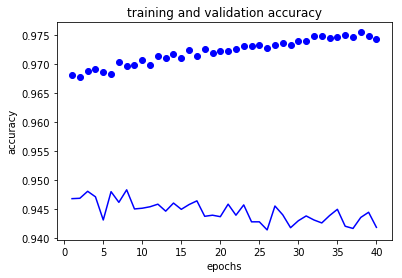

In [33]:
import matplotlib.pyplot as plt
epochs=range(1,len(tra_acc)+1)
plt.plot(epochs,tra_acc,'bo',label='training_accu')
plt.plot(epochs,val_acc,'b',label='val_accu')
plt.title('training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()

In [34]:
np.set_printoptions(suppress=True)
df2=pd.read_csv('criminal_test.csv')
scaler.fit(df2.drop(['100100'],axis=1))
scaled_features1 = scaler.transform(df2.drop(['100100'],axis=1))
X_test = pd.DataFrame(scaled_features1,columns=df2.columns[1:71])
pre=model.predict(X_test)



In [37]:
y_test=df2.iloc[:,-1]

In [38]:
evalu=model.evaluate(X_test,y_test)

11430/11430 [==============================] - 0s 35us/step


In [42]:
evalu[0]

19.930441123982426

In [24]:
df2

,100100,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,66583679,4,0,4,1,2,1,1,1,99,...,2,2,2,1,1,2,2,16346.795400,40020,1
1,35494679,4,0,4,1,1,1,1,1,99,...,3,2,2,1,1,2,2,3008.863906,40044,2
2,79424679,2,0,3,1,2,1,1,1,99,...,1,2,2,2,2,2,2,266.952503,40040,2
3,11744679,4,0,6,1,2,1,1,1,99,...,3,2,2,1,1,2,2,5386.928199,40017,1
4,31554679,1,0,4,1,3,1,1,1,99,...,3,2,1,1,1,2,2,173.489895,40017,1
5,83164679,1,0,6,1,4,1,1,1,99,...,1,2,2,1,1,2,2,562.268242,40035,2
6,58474679,4,0,2,1,1,1,2,1,99,...,2,1,2,1,1,2,2,24857.283570,40040,2
7,40695779,4,0,1,1,1,1,1,1,99,...,1,1,2,1,1,2,2,6219.428316,40015,2
8,39315779,4,0,2,1,1,1,1,1,99,...,3,2,2,2,3,2,2,5256.401262,40022,1
9,58415779,4,0,2,1,1,1,3,1,99,...,3,2,2,2,3,2,2,8081.240889,40023,1


In [120]:
pre

array([[0.55915207],
       [0.        ],
       [0.        ],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

In [108]:
ma=np.max(pre)
ma
pre1=pre/ma
round(pre1[0])
pre2=np.round(pre1)
len(pre2)

11430

In [62]:
"""
pred=[]
for i in range(11430):
    if pre[i][0]>pre[i][1]:
        pred.append(0)
    else:
        pred.append(1)
    
"""

In [144]:

pre2=[]
for i in range(11430):
    if (pre[i]<0.8):
        pre2.append(int(0))
    else:
        pre2.append(int(1) )

        

In [142]:
#np.savetxt('prediction.csv',pre2,fmt='%0.0f')

In [145]:
df2 = df2.rename(columns={'100100': 'PERID'})
dataframe1=df2
dataframe1['Criminal']=pre2
db=dataframe1.iloc[:,[0,71]]
#pd.read_csv('prediction.csv')
db.to_csv('test_Predictions.csv',index=None)

In [197]:
#db=db.set_value(11430,'PERID',10060480)

In [198]:

#db=db.set_value(11430,'Criminal',0)